In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#This reading in the 2015 Group public reporting of patient experience of physicians all around the
#country.

Physician = pd.read_csv('Physician_Compare_2015_Group_Public_Reporting_-_Patient_Experience.csv')

In [6]:
Physician.head()

,Organization legal name or 'doing business as' name,Group PAC ID,State,Measure Identifier,Measure Title,Measure Performance Rate,Footnote
0,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_1,"Getting timely care, appointments, and informa...",63.0,NaN
1,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_10,Between visit communication.,49.0,NaN
2,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_12,Attention to patient medication cost.,27.0,NaN
3,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_2,How well clinicians communicate.,86.0,NaN
4,HERITAGE VALLEY MEDICAL GROUP INC,42105678,PA,CAHPS_GRP_3,Patients' rating of clinicians.,83.0,NaN


In [7]:
#We are creating a dataframe out of our csv

df = pd.DataFrame(Physician)

In [8]:
#This is showing how many rows and columns there are in this dataframe respectively

df.shape

(3432, 7)

In [9]:
#This is counting how many performance rate samples there are, the mean, standard deviation,
#max, and min amount for performance rate

df['Measure Performance Rate'].describe()

count    3121.000000
mean       65.215956
std        18.519778
min         6.000000
25%        57.000000
50%        69.000000
75%        80.000000
max        95.000000
Name: Measure Performance Rate, dtype: float64

In [13]:
#Here we are counting how many null values we have and putting that into a percentage. As we can
#see for all of the footnotes that are missing, there is a measure performance rate. How can we 
#turn this into useful information

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Footnote,3121,1.0
Measure Performance Rate,0,0.0
Measure Title,0,0.0
Measure Identifier,0,0.0
State,0,0.0
Group PAC ID,0,0.0
Organization legal name or 'doing business as' name,0,0.0


In [11]:
#The footnote means the sample size was too small or unreliable to use their measure performance 
#I think we should just take the average performance rate because wee would be changing a little
#Less than 10% 

In [12]:
df = df.dropna(subset=['Measure Performance Rate']) 

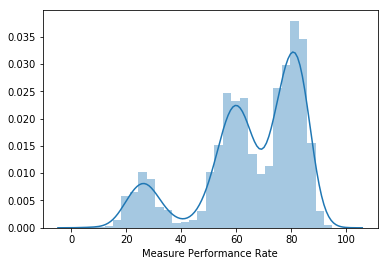

In [15]:
#Here we are making a distribution plot of measure performance rate by patient experience

sns.distplot(df['Measure Performance Rate']);